# CPD with B-series data

In [1]:

%run B_series_functions.ipynb 

In [2]:
"""read all 2021 Bseries filenames from folder system"""
path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel"#common path
"""Read all B series filnames"""
filenames_B = np.array(read_B_series_subfolders(path),dtype=object)
filenames_B = np.unique(filenames_B)#remove duplicate files

# Sliding window CPD B-series data

In [3]:
"""B56 A14 A1"""
path_B56="/Users/georgecowie/Documents/Master/Masteroppgave/Master_thesis/MatLab/B56/\B560818162851.csv"
B56_18082020,B56_18082020_low_pass, B56_18082020_n,v_tot = gen_signal(path_B56)
acc = np.diff(v_tot)/0.01
#B56_bkps = window_cpd(B56_18082020_low_pass[:,-1],"ar",width = 200,jump = 10,dim = 3,sigma=0.7)
#B56_bkps = window_cpd(acc,"ar",width = 200,jump = 10,dim = 1,sigma=0.1)
#B56_bkps = window_cpd(v_tot,"ar",width = 100,jump = 10,dim = 1,sigma=4)
B56_bkps_1 = window_cpd(B56_18082020,"ar",width = 100,jump = 10,dim = 6,sigma=1)

B56_18082020_start = 12729#B56_bkps[0]#12729
B56_18082020_end = 27149
time_B56_18082020 = time_array(B56_18082020_start,B56_18082020_end)

B56_18082020_vcp = np.array([0.0,1.6,2.5,3.3,6.0,7.5,8.2,10.2,13.3,14.1,15.1,21.1,22.4,23.4,24.2,26.1,28.8,33.4,35.0,36.0,36.1,38.3,42.4,46.1,47.4,49.1,58.4,59.2,59.9,63.8,65.5,73.5,77.4,82.1,87.1,89.0,91.6,93.2,98.6,105.5,111.5,116.4,117.5,120.2,121.8,133.1,134.6,135.7,140.3])
B56_18082020_vcp_idx = index_finder(B56_18082020_vcp,time_B56_18082020,B56_18082020_start)

B56_18082020_meanders = np.array([1.0,9.4,11.7,14.5,33.1,34.0,37.7,38.4,41.5,42.4,46.0,47.7,48.9,57.7,62.7,64.5,65.8,66.9,72.9,74.9,80.4,87.7,90.3,92.0,93.7,104.5,110.6,112.0,117.9,124.2,137.0])
B56_18082020_meanders_idx = index_finder(B56_18082020_meanders,time_B56_18082020,B56_18082020_start)

print("Number of manually detected cp: ",len(B56_18082020_meanders)+ len(B56_18082020_vcp))


plt.plot(B56_18082020_vcp_idx,np.ones(len(B56_18082020_vcp_idx)),marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(B56_18082020_meanders_idx,np.ones(len(B56_18082020_meanders_idx)),marker = "*", color = "b", label = "Meanders",ls = "None")
plt.legend()
plt.show()






2851


ValueError: not enough values to unpack (expected 4, got 3)

140818162018
140818162018


<IPython.core.display.Javascript object>


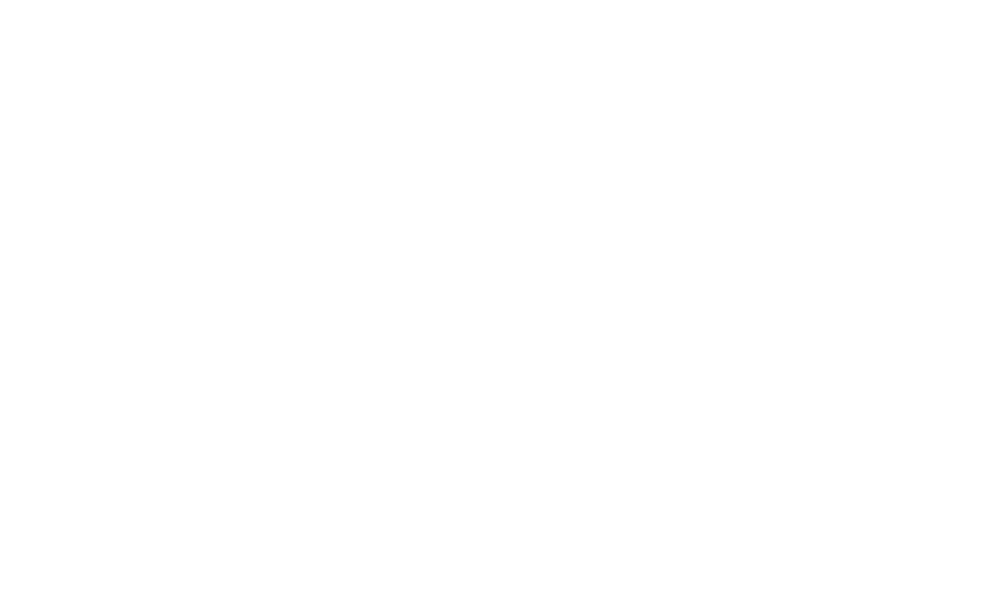

Number of changepoints:  42
Number of manually detected cp:  47


In [8]:
plt.close()
"""B14 A13-A1 
Parts of the beginning of the dataset are missing
The time data of the visually inspected videos have to be manipulated to fit"""
path_B14 = "/Users/georgecowie/Documents/Master/Masteroppgave/Master_thesis/MatLab/B14/A13_A1/r_B140818162018.csv"

B14_18082020, B14_18082020_low_pass,  B14_18082020_n,B14_18082020_v_tot = gen_signal(path_B14)
B14_bkps = window_cpd(B14_18082020,"ar",100,5,4,sigma=1)

B14_18082020_start = 0#B14_bkps[1]#12729
B14_18082020_end = 27149
time_B14_18082020 = time_array(B14_18082020_start,B14_18082020_end)

#B14_18082020_vcp = np.array([0.0,2.2,3.3,9.4,15.6,21.6,23.3,24.3,25.2,29.2,30.6,32.7,36.7,40.2,40.8,48.4,49.3,50.3,55.2,57.0,61.9,64.2,66.5,73.7,77.6,78.7,81.6,85.9,84.0,97.0,98.2,99.8,103.1])
B14_18082020_vcp = np.array([21.6,23.3,24.3,25.2,29.2,30.6,32.7,36.7,40.2,40.8,48.4,49.3,50.3,55.2,57.0,61.9,64.2,66.5,73.7,77.6,78.7,81.6,85.9,84.0,97.0,98.2,99.8,103.1])


B14_18082020_vcp = B14_18082020_vcp#- B14_18082020_vcp[0]
B14_18082020_vcp_idx = index_finder(B14_18082020_vcp,time_B14_18082020,B14_18082020_start)

time_diff = abs(B14_18082020_vcp_idx[-1] - 8315)#make the two datasets fit together by making the ends the same

B14_18082020_vcp_idx = B14_18082020_vcp_idx - time_diff

#B14_18082020_meanders = np.array([0.8,4.7,5.3,8.5,9.6,13.0,14.3,15.3,22.8,28.1,29.7,30.5,35.3,36.2,38.1,43.5,45.9,51.0,53.9,55.6,57.5,65.6,71.4,72.9,79.2,86.0,100.7])
B14_18082020_meanders = np.array([22.8,28.1,29.7,30.5,35.3,36.2,38.1,43.5,45.9,51.0,53.9,55.6,57.5,65.6,71.4,72.9,79.2,86.0,100.7])
B14_18082020_meanders_idx = index_finder(B14_18082020_meanders,time_B14_18082020,B14_18082020_start)

B14_18082020_meanders_idx = B14_18082020_meanders_idx- time_diff

print("Number of manually detected cp: ",len(B14_18082020_meanders)+ len(B14_18082020_vcp))



plt.plot(B14_18082020_vcp_idx,np.ones(len(B14_18082020_vcp_idx)),marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(B14_18082020_meanders_idx,np.ones(len(B14_18082020_meanders_idx)),marker = "*", color = "b", label = "Meanders",ls = "None")
plt.legend()
plt.show()


00818171840
00818171840


<IPython.core.display.Javascript object>


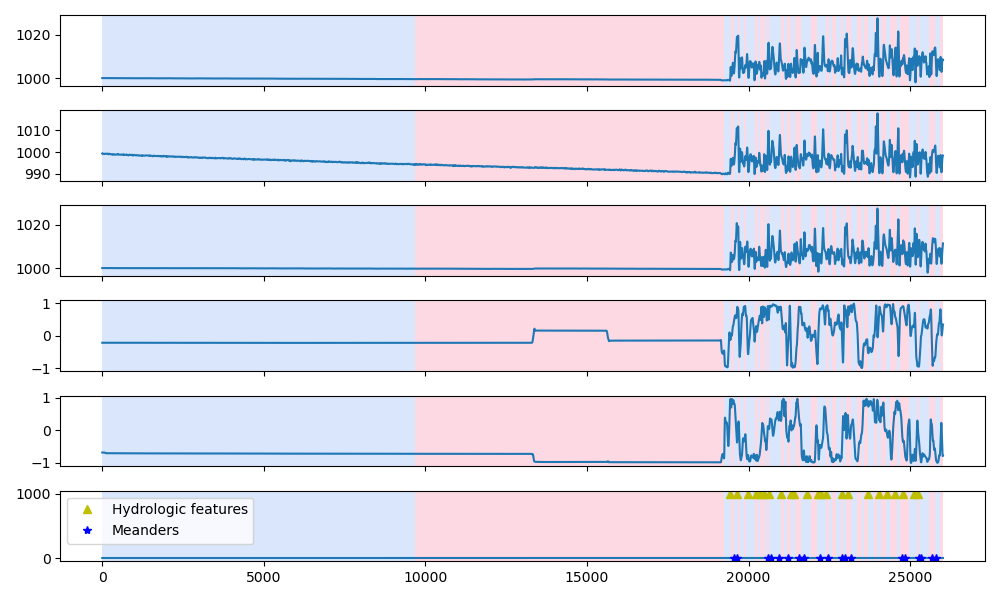

Number of changepoints:  48
Number of manually detected cp:  42


In [9]:
plt.close()
"""B80 A15-A1 
"""
path_B80_A15="/Users/georgecowie/Documents/Master/Masteroppgave/Master_thesis/MatLab/B80/A15_A1/\B800818171840.csv"

B80_A15, B80_A15_low_pass,  B80_A15_n,B80_A15_v_tot = gen_signal(path_B80_A15)
#B80_A15 = window_cpd(B80_A15,"ar",100,5,4,sigma=1)
B80_A15 = window_cpd(B80_A15_low_pass,"ar",100,5,4,sigma=1)




B80_A15_start = 19430#B14_bkps[1]#12729
B80_A15_end = 37149
time_B80_A15 = time_array(B80_A15_start,B80_A15_end)

B80_A15_vcp = np.array([0.0,2.0,5.4,8.2,9.4,10.4,12.2,15.8,19.0,19.8,24.1,27.4,28.5,30.0,34.9,36.8,43.0,46.4,49.0,51.5,54.1,57.3,58.6])
#,70.6,79.2,80.3,80.9,95.9,105.1,106.3,108.4,111.2,113.0,118.0,122.9,129.6,134.9,135.8,138.6,140.0,140.9,151.3,153.8,156.7])
B80_A15_vcp_idx = index_finder(B80_A15_vcp,time_B80_A15,B80_A15_start)

time_diff =0# abs(B80_A15_vcp_idx[-1] - 8315)#make the two datasets fit together by making the ends the same

B80_A15_vcp_idx = B80_A15_vcp_idx - time_diff

#B14_18082020_meanders = np.array([0.8,4.7,5.3,8.5,9.6,13.0,14.3,15.3,22.8,28.1,29.7,30.5,35.3,36.2,38.1,43.5,45.9,51.0,53.9,55.6,57.5,65.6,71.4,72.9,79.2,86.0,100.7])
B80_A15_meanders = np.array([1.3,2.2,11.7,12.8,15.3,18.0,21.6,23.1,28.2,30.6,34.9,35.8,37.8,53.7,54.5,58.9,59.7,63.0,64.3])
#67.0,69.8,70.9,79.3,83.6,85.4,87.0,87.9,92.3,93.8,100.0,102.1,106.9,110.2,111.8,113.4,117.8,122.1,128.6,136.4,142.6,153.6])
B80_A15_meanders_idx = index_finder(B80_A15_meanders,time_B80_A15,B80_A15_start)

B80_A15_meanders_idx = B80_A15_meanders_idx- time_diff

print("Number of manually detected cp: ",len(B80_A15_meanders)+ len(B80_A15_vcp))



plt.plot(B80_A15_vcp_idx,np.ones(len(B80_A15_vcp_idx))*1000,marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(B80_A15_meanders_idx,np.ones(len(B80_A15_meanders_idx)),marker = "*", color = "b", label = "Meanders",ls = "None")
plt.legend()
plt.show()



In [10]:
"""B80 A8 A1"""
B80_18082020_start = 19400#B56_bkps[0]#12729
B80_18082020_end = 29149
time_B80_18082020 = time_array(B80_18082020_start,B80_18082020_end)

B80_A15_18082020_vcp = np.array([0.0,1.6,2.5,3.3,6.0,7.5,8.2,10.2,13.3,14.1,15.1,21.1,22.4,23.4,24.2,26.1,28.8,33.4,35.0,36.0,36.1,38.3,42.4,46.1,47.4,49.1,58.4,59.2,59.9,63.8,65.5,73.5,77.4,82.1,87.1,89.0,91.6,93.2,98.6,105.5,111.5,116.4,117.5,120.2,121.8,133.1,134.6,135.7,140.3])
B80_18082020_vcp_idx = index_finder(B80_18082020_vcp,time_B80_18082020,B80_18082020_start)

B80_18082020_meanders = np.array([1.0,9.4,11.7,14.5,33.1,34.0,37.7,38.4,41.5,42.4,46.0,47.7,48.9,57.7,62.7,64.5,65.8,66.9,72.9,74.9,80.4,87.7,90.3,92.0,93.7,104.5,110.6,112.0,117.9,124.2,137.0,])
#B56_18082020_meanders_idx = index_finder(B56_18082020_meanders,time_B56_18082020,B56_18082020_start)
B80_A1518082020, B80_A1518082020_norm, B80_A1518082020_mean, B80_A1518082020_n = gen_signal(path_B80)


sigma = 1
B80_bkps = window_cpd(B80_A1518082020[:,0:2],"ar",100,10,4,sigma = 2)
plt.plot(B56_18082020_vcp_idx,np.ones(len(B56_18082020_vcp_idx)),marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(B56_18082020_meanders_idx,np.ones(len(B56_18082020_meanders_idx)),marker = "*", color = "b", label = "Meanders",ls = "None")
plt.legend()
plt.show()

NameError: name 'B80_18082020_vcp' is not defined

dx =  0.01


<IPython.core.display.Javascript object>


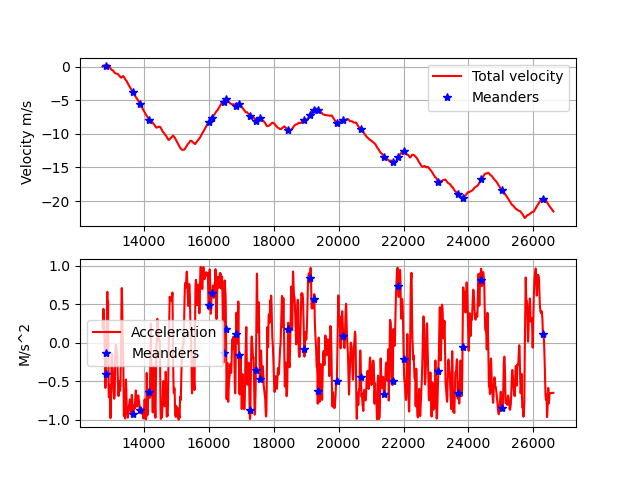

In [11]:
#plot total velocity together with manually registered meanders
def plot_velocity_meanders(meanders,hydraulic_features,tot_vel,offset):
    plt.close()
    time_s = np.linspace(hydraulic_features[0],hydraulic_features[-1],abs(hydraulic_features[0]-hydraulic_features[-1]))
    v_0 = tot_vel[hydraulic_features[0]] #start velocity set to 0 where the drifter is deployed
    tot_vel = tot_vel - v_0
    plt.close()
    
    dx = 0.01
    acc = np.diff(tot_vel)/dx
    print("dx = ",dx)
    ax1 = plt.subplot(211)
    ax1.plot(time_s,tot_vel[hydraulic_features[0]:hydraulic_features[-1]],label = "Total velocity",color = "r")
    ax1.plot(meanders,np.ones(len(meanders))*tot_vel[meanders],marker = "*", color = "b", label = "Meanders",ls = "None")
    #ax1.plot(time_s,np.zeros(len(time_s)))
    plt.ylabel("Velocity m/s")
    plt.legend()
    plt.grid()

    ax2 = plt.subplot(212)
    ax2.plot(time_s,acc[hydraulic_features[0]:hydraulic_features[-1]],label = "Acceleration",color = "r")
    ax2.plot(meanders,np.ones(len(meanders))*acc[meanders],marker = "*", color = "b", label = "Meanders",ls = "None")
    plt.legend()
    plt.ylabel("M/s^2")
    plt.grid()
    plt.show()


#plot_velocity_meanders(B14_18082020_meanders_idx,B14_18082020_vcp_idx,B14_18082020_v_tot,0)
plot_velocity_meanders(B56_18082020_meanders_idx,B56_18082020_vcp_idx,v_tot,17.44) 
#plot_velocity_meanders(B56_18082020_vcp_idx,B56_18082020_vcp_idx,v_tot,17.44) 
#plot_velocity_meanders(B80_A15_meanders_idx,B80_A15_vcp_idx,B80_A15_v_tot,0) 

